In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv(r'Data_sets\Diet_Dataset.csv')

In [6]:
df.head()

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,1,1,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
1,Avocados,1,0,0,0,0,160,15.0,2.0,0.55,12.0,7.0,485.0,8.5,6.7,0.0,0.7,https://domf5oio6qrcr.cloudfront.net/medialibr...
2,Bananas,1,0,0,0,0,89,0.3,1.1,0.26,5.0,1.0,358.0,23.0,2.6,0.0,12.0,https://images.heb.com/is/image/HEBGrocery/000...
3,Boiled Egg,1,1,1,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,1,1,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food_items     231 non-null    object 
 1   Breakfast      231 non-null    int64  
 2   Lunch          231 non-null    int64  
 3   Dinner         231 non-null    int64  
 4   VegNovVeg      231 non-null    int64  
 5   Junk Food      231 non-null    int64  
 6   Calories       231 non-null    int64  
 7   Fats           231 non-null    float64
 8   Proteins       231 non-null    float64
 9   Iron           231 non-null    float64
 10  Calcium        231 non-null    float64
 11  Sodium         231 non-null    float64
 12  Potassium      231 non-null    float64
 13  Carbohydrates  231 non-null    float64
 14  Fibre          231 non-null    float64
 15  VitaminD       231 non-null    float64
 16  Sugars         231 non-null    float64
 17  Link           231 non-null    object 
dtypes: float64

In [9]:
print(df.isnull().sum().sort_values(ascending=False))

Food_items       0
Breakfast        0
Lunch            0
Dinner           0
VegNovVeg        0
Junk Food        0
Calories         0
Fats             0
Proteins         0
Iron             0
Calcium          0
Sodium           0
Potassium        0
Carbohydrates    0
Fibre            0
VitaminD         0
Sugars           0
Link             0
dtype: int64


In [10]:
df.duplicated().sum()

np.int64(0)

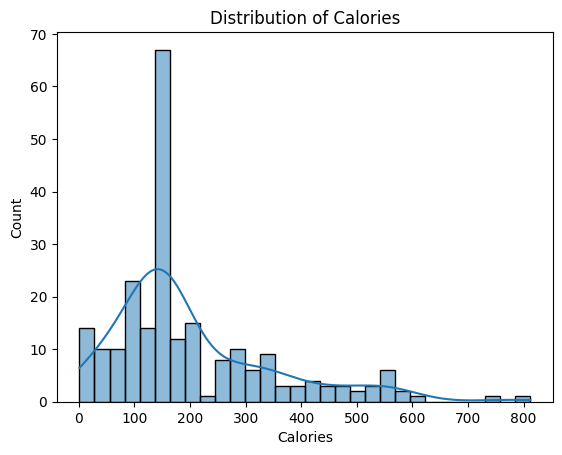

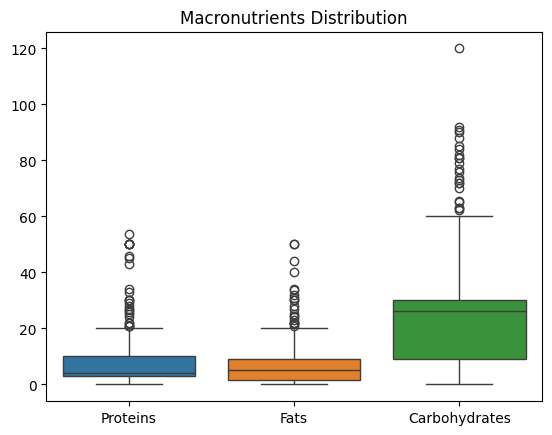

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Distribution of Calories')
plt.show()


sns.boxplot(data=df[['Proteins','Fats','Carbohydrates']])
plt.title('Macronutrients Distribution')
plt.show()

In [15]:
def categorize_nutrition(row):
    if row['Proteins'] >row['Carbohydrates'] and row['Proteins'] > row['Fats']:
        return 'High-Protein'
    elif row['Carbohydrates'] > row['Proteins'] and row['Carbohydrates'] > row['Fats']:
        return 'High-Carb'
    elif row['Fats'] > row['Proteins'] and row['Fats'] > row['Carbohydrates']:
        return 'High-Fat'
    else:
        return 'Balanced'
df['Nutrition_Type'] = df.apply(categorize_nutrition, axis=1)

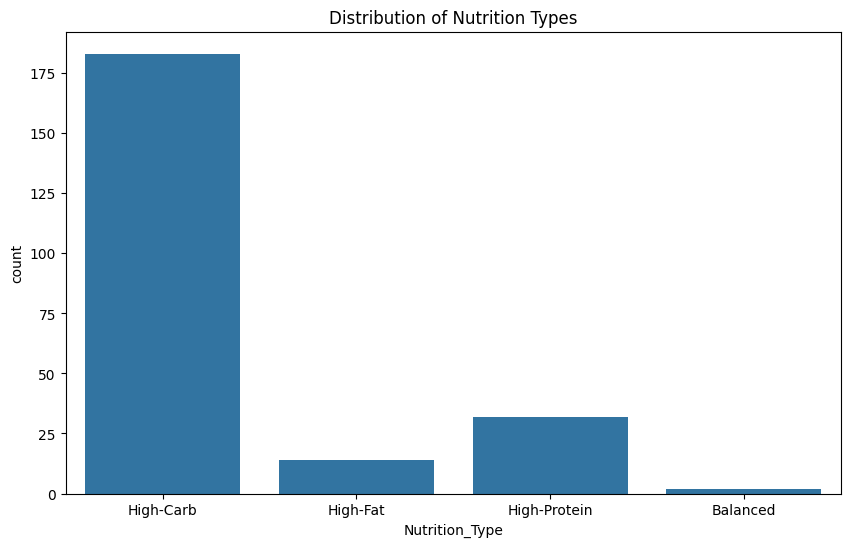

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Nutrition_Type')
plt.title('Distribution of Nutrition Types')
plt.show()

C:\Users\samri\AppData\Local\Temp\ipykernel_12136\768425131.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\samri\AppData\Local\Temp\ipykernel_12136\768425131.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
C:\Users\samri\AppData\Local\Temp\ipykernel_12136\768425131.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


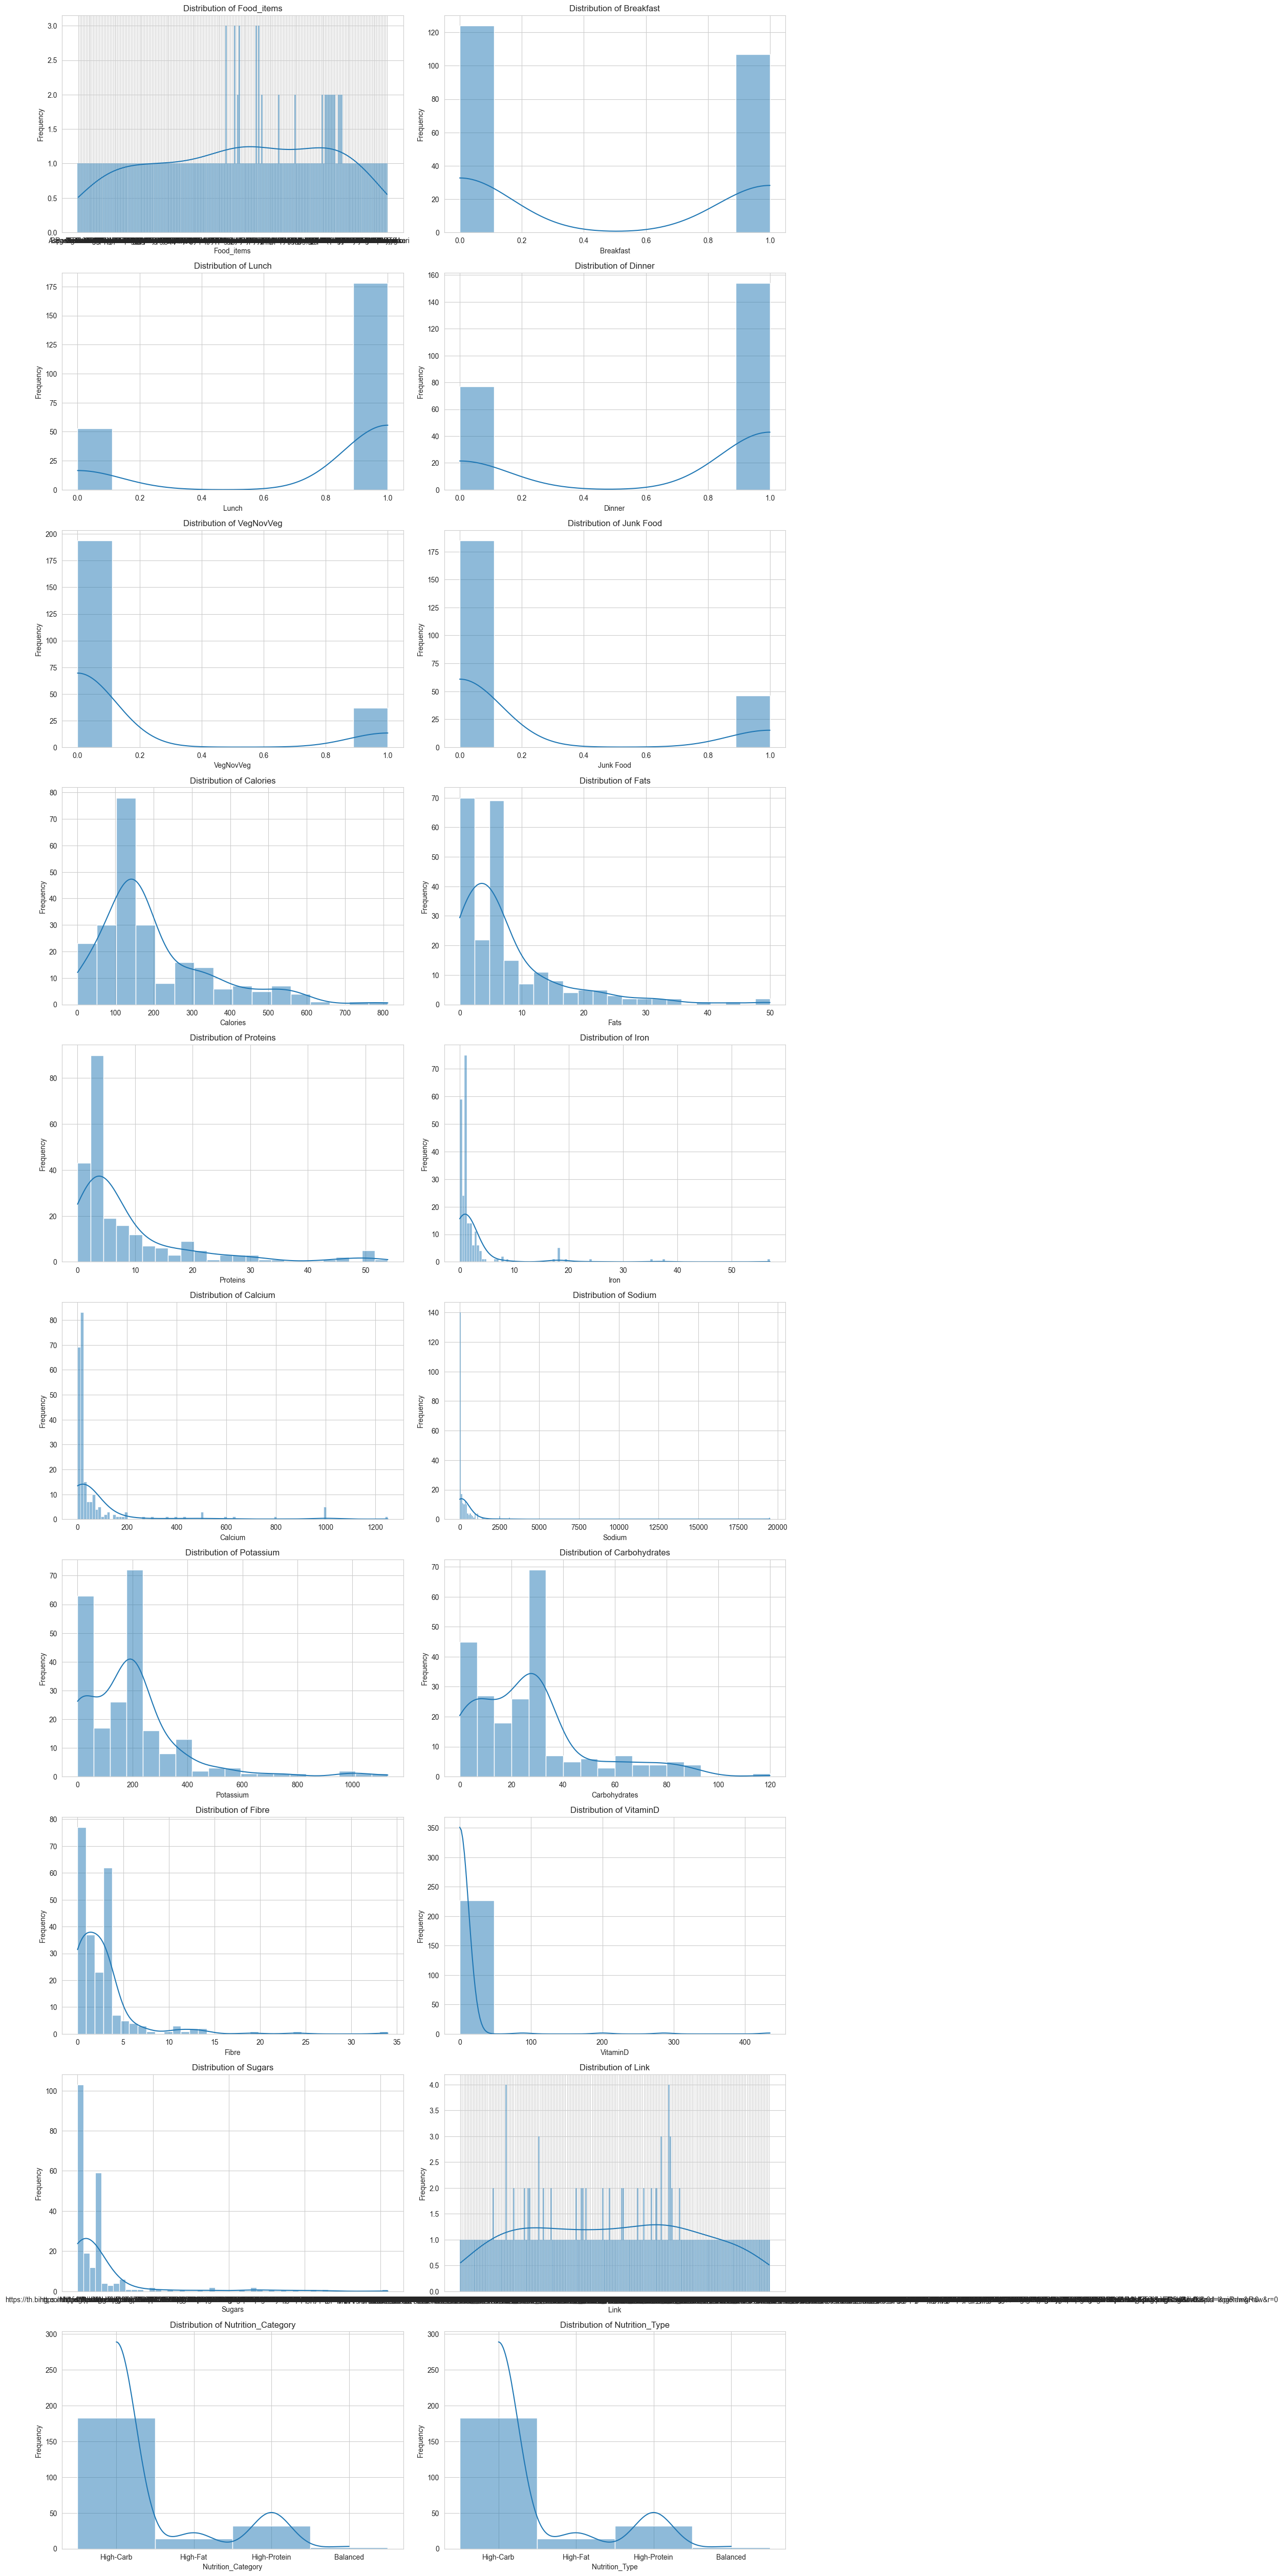

In [17]:
sns.set_style("whitegrid")

num_nutrients = len(df.columns)
n_rows= (num_nutrients + 1) // 2

plt.figure(figsize=(15, 5 * n_rows))

for i, nutrient in enumerate(df.columns,1):
    plt.subplot(n_rows, 2, i)
    sns.histplot(df[nutrient], kde=True)
    plt.title(f'Distribution of {nutrient}')
    plt.xlabel(nutrient)
    plt.ylabel('Frequency')

    plt.tight_layout()
plt.show()

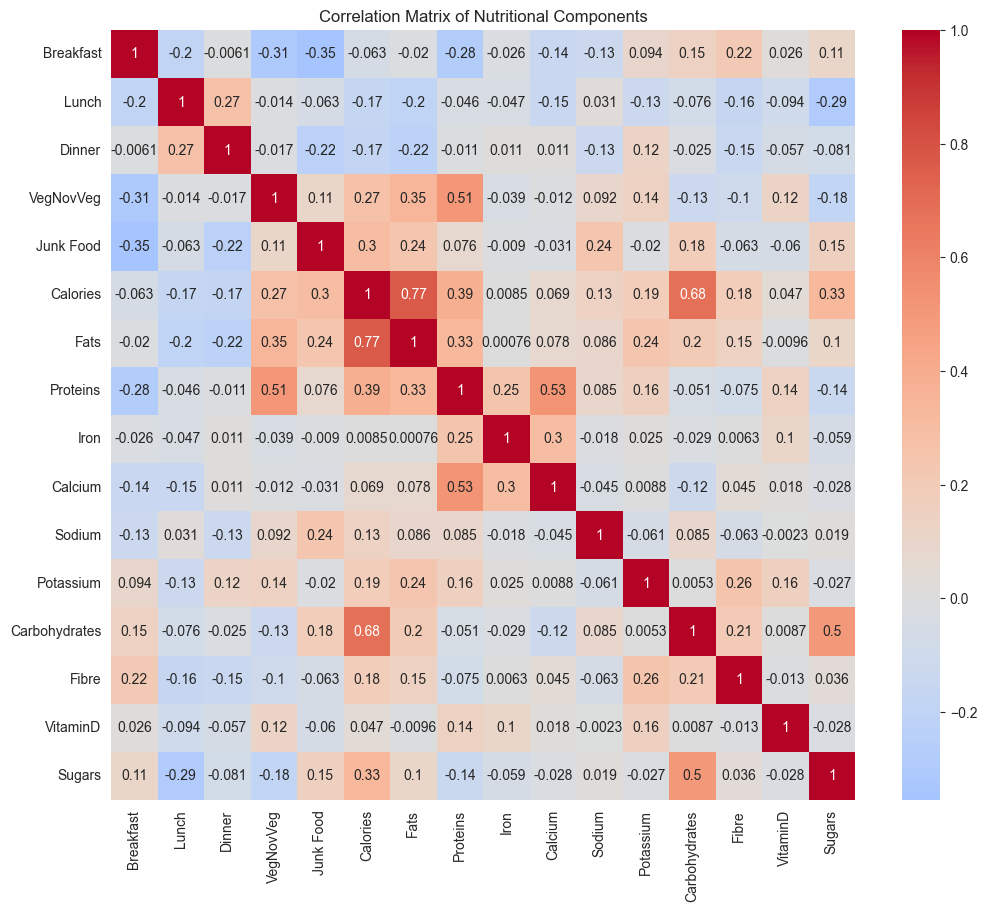

In [18]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['Float64','int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Nutritional Components')
plt.show()

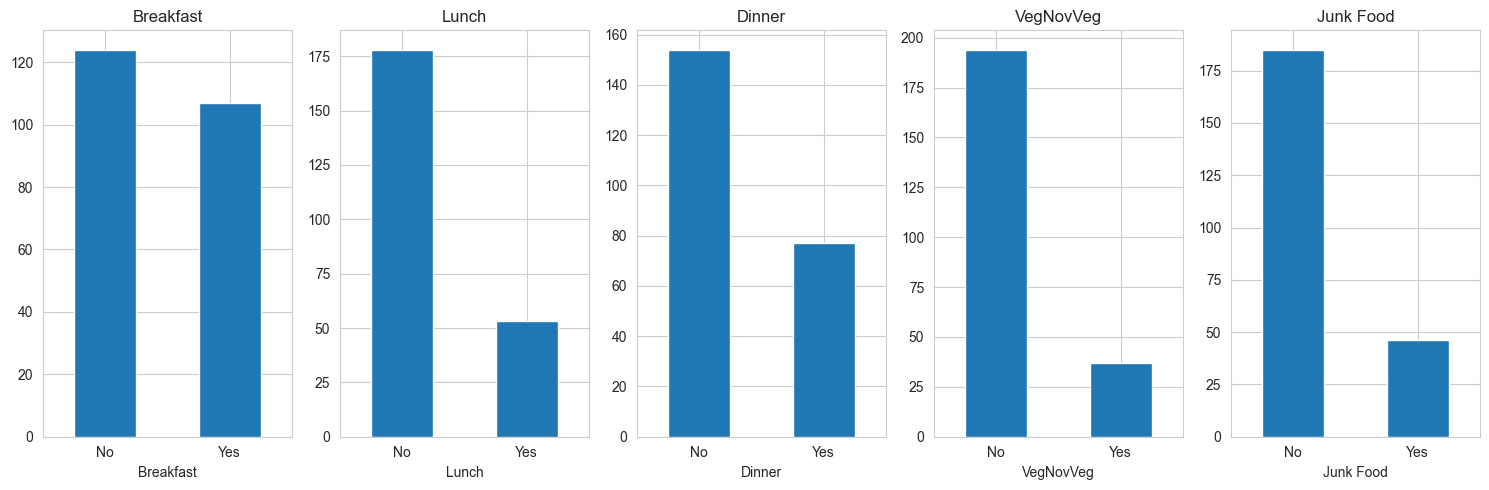

In [20]:
#Plot food categories
categories=['Breakfast','Lunch','Dinner','VegNovVeg','Junk Food']

plt.figure(figsize=(15,5))

for i , category in enumerate(categories,1):
    plt.subplot(1,5,i)
    df[category].value_counts().plot(kind='bar')
    plt.title(category)
    plt.xticks([0,1],['No','Yes'],rotation=0)


plt.tight_layout()
plt.show()

In [21]:
breakfast_data=df[df['Breakfast']==1][['Food_items','VegNovVeg','Junk Food','Calories','Fats','Proteins','Iron','Calcium','Sodium','Potassium','Carbohydrates','Fibre','VitaminD','Sugars','Link']]

In [22]:
breakfast_data.head()


,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
1,Avocados,0,0,160,15.0,2.0,0.55,12.0,7.0,485.0,8.5,6.7,0.0,0.7,https://domf5oio6qrcr.cloudfront.net/medialibr...
2,Bananas,0,0,89,0.3,1.1,0.26,5.0,1.0,358.0,23.0,2.6,0.0,12.0,https://images.heb.com/is/image/HEBGrocery/000...
3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
6,Berries,0,0,349,0.4,14.0,6.80,190.0,298.0,77.0,77.0,13.0,0.0,46.0,https://th.bing.com/th/id/R.7b7c8a6bac9677484b...


In [25]:
breakfast_data.shape
df.columns


Index(['Food_items', 'Breakfast', 'Lunch', 'Dinner', 'VegNovVeg', 'Junk Food',
       'Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium',
       'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars', 'Link',
       'Nutrition_Category', 'Nutrition_Type'],
      dtype='object')

In [24]:
lunch_data=df[df['Lunch']==1][['Food_items','VegNovVeg','Junk Food','Calories','Fats','Proteins','Iron','Calcium','Sodium','Potassium','Carbohydrates','Fibre','VitaminD','Sugars','Link']]

In [26]:
lunch_data.shape

(178, 15)

In [27]:
dinner_data=df[df['Dinner']==1][['Food_items','VegNovVeg','Junk Food','Calories','Fats','Proteins','Iron','Calcium','Sodium','Potassium','Carbohydrates','Fibre','VitaminD','Sugars','Link']]

In [29]:
dinner_data.head()


,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
5,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
7,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


In [30]:
dinner_data.shape

(154, 15)

In [31]:
breakfast_data.to_csv(r'Data_sets\Breakfast_data.csv')
lunch_data.to_csv(r'Data_sets\Lunch_data.csv')
dinner_data.to_csv(r'Data_sets\Dinner_data.csv')

In [32]:
breakfast=pd.read_csv('Data_sets/Breakfast_data.csv')
lunch=pd.read_csv('Data_sets/Lunch_data.csv')
dinner=pd.read_csv('Data_sets/Dinner_data.csv')

In [33]:
display(breakfast.head())
display(lunch.head())
display(dinner.head())

,Unnamed: 0,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,1,Avocados,0,0,160,15.0,2.0,0.55,12.0,7.0,485.0,8.5,6.7,0.0,0.7,https://domf5oio6qrcr.cloudfront.net/medialibr...
1,2,Bananas,0,0,89,0.3,1.1,0.26,5.0,1.0,358.0,23.0,2.6,0.0,12.0,https://images.heb.com/is/image/HEBGrocery/000...
2,3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
3,4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
4,6,Berries,0,0,349,0.4,14.0,6.80,190.0,298.0,77.0,77.0,13.0,0.0,46.0,https://th.bing.com/th/id/R.7b7c8a6bac9677484b...


,Unnamed: 0,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
1,3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
2,4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
3,5,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
4,7,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


,Unnamed: 0,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
1,3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
2,4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
3,5,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
4,7,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


In [34]:
def prepare_data(df):
    """Select nutritional features and clean data"""
    features=df[['Calories','Proteins','Carbohydrates','Fats']]
    return features.dropna()

bf_features=prepare_data(breakfast)
ln_features=prepare_data(lunch)
dn_features=prepare_data(dinner)

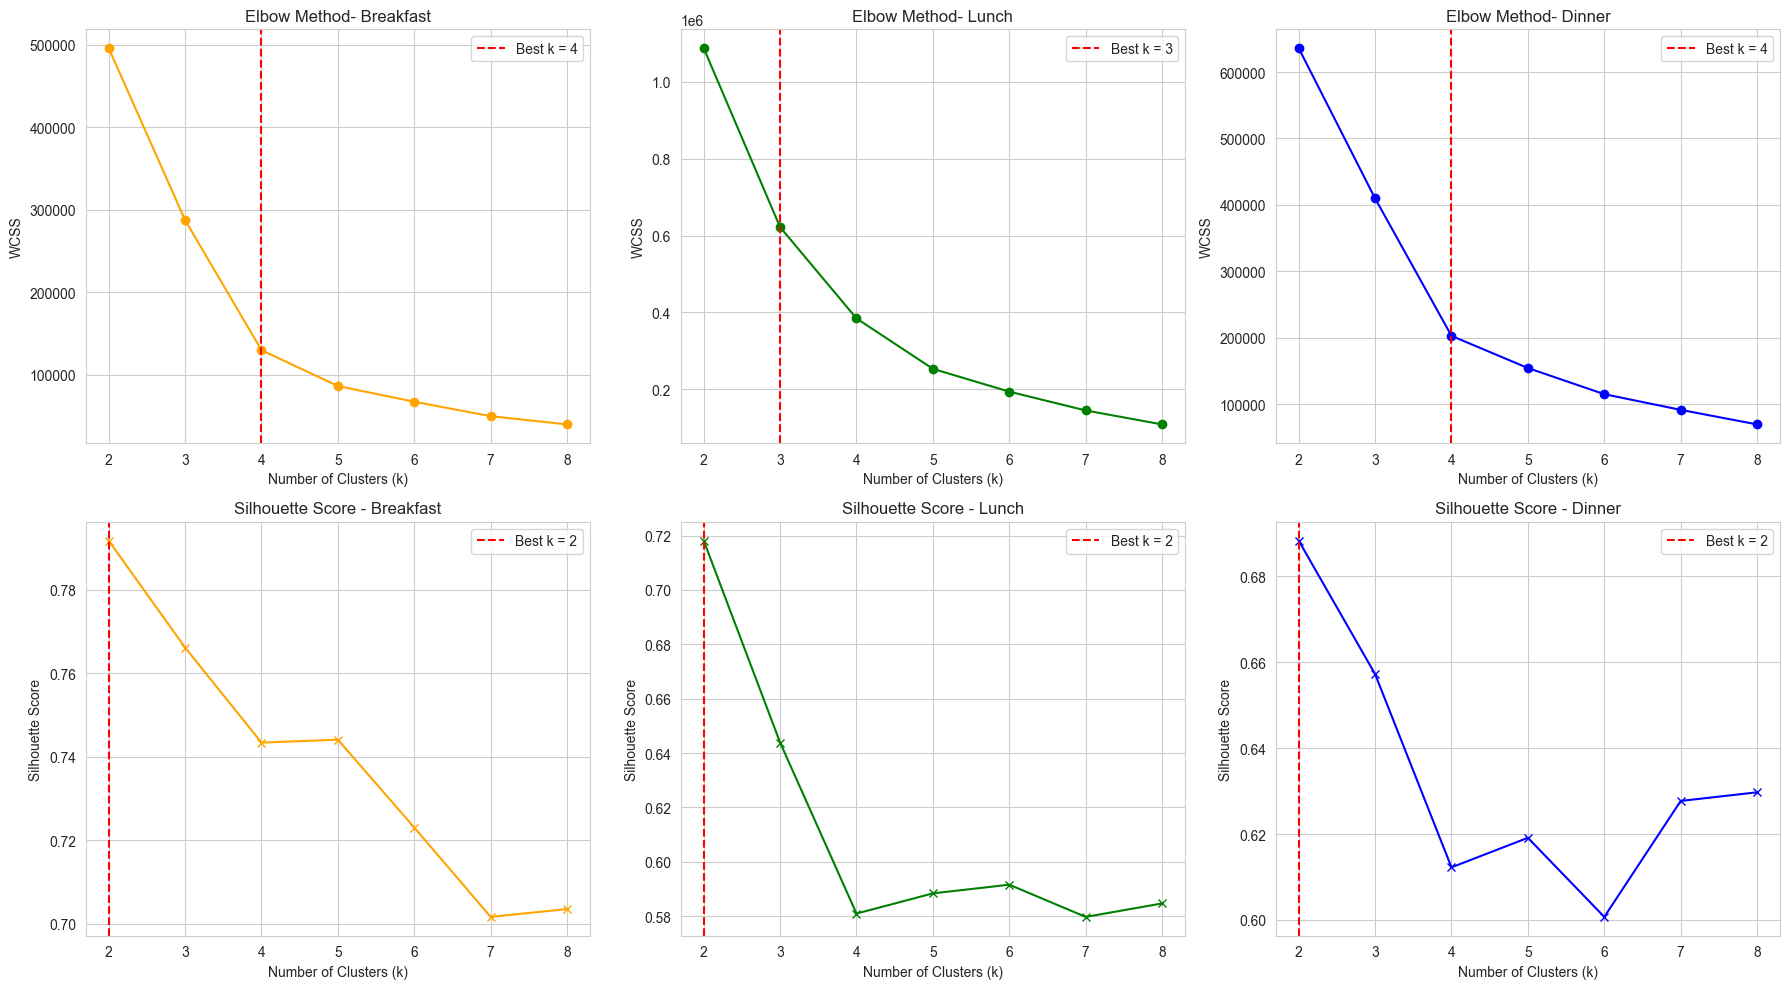

In [42]:
import numpy as np
import matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_kmeasn_metrics(data, max_k=8):
    wcss = []
    silhouette_scores = []
    for k in range(2, max_k +1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))

    elbow_deltas = np.diff(wcss, 2)
    elbow_k = np.argmax(elbow_deltas) + 3 if len(elbow_deltas) > 0 else 2
    sil_k = np.argmax(silhouette_scores) +2

    return wcss, silhouette_scores, elbow_k, sil_k
def plot_elbow_silhoutte_all():
    plt.figure(figsize=(18 ,10))
    datasets = [
        ('Breakfast', bf_features, 'orange'),
        ('Lunch', ln_features, 'green'),
        ('Dinner', dn_features, 'blue')
    ]

    for i,(label,data,color) in enumerate(datasets):
        wcss, sils, elbow_k, sil_k = get_kmeasn_metrics(data)
        k_range = list(range(2, len(wcss) + 2))


        plt.subplot(2, 3, i + 1)
        plt.plot(k_range,wcss, marker='o', color=color)
        plt.axvline(x=elbow_k, color='red', linestyle='--', label=f'Best k = {elbow_k}')
        plt.title(f'Elbow Method- {label}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('WCSS')
        plt.legend()

        plt.subplot(2, 3, i + 4)
        plt.plot(k_range, sils, marker='x', color=color)
        plt.axvline(x=sil_k, color='red', linestyle='--', label=f'Best k = {sil_k}')
        plt.title(f'Silhouette Score - {label}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Silhouette Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_elbow_silhoutte_all()

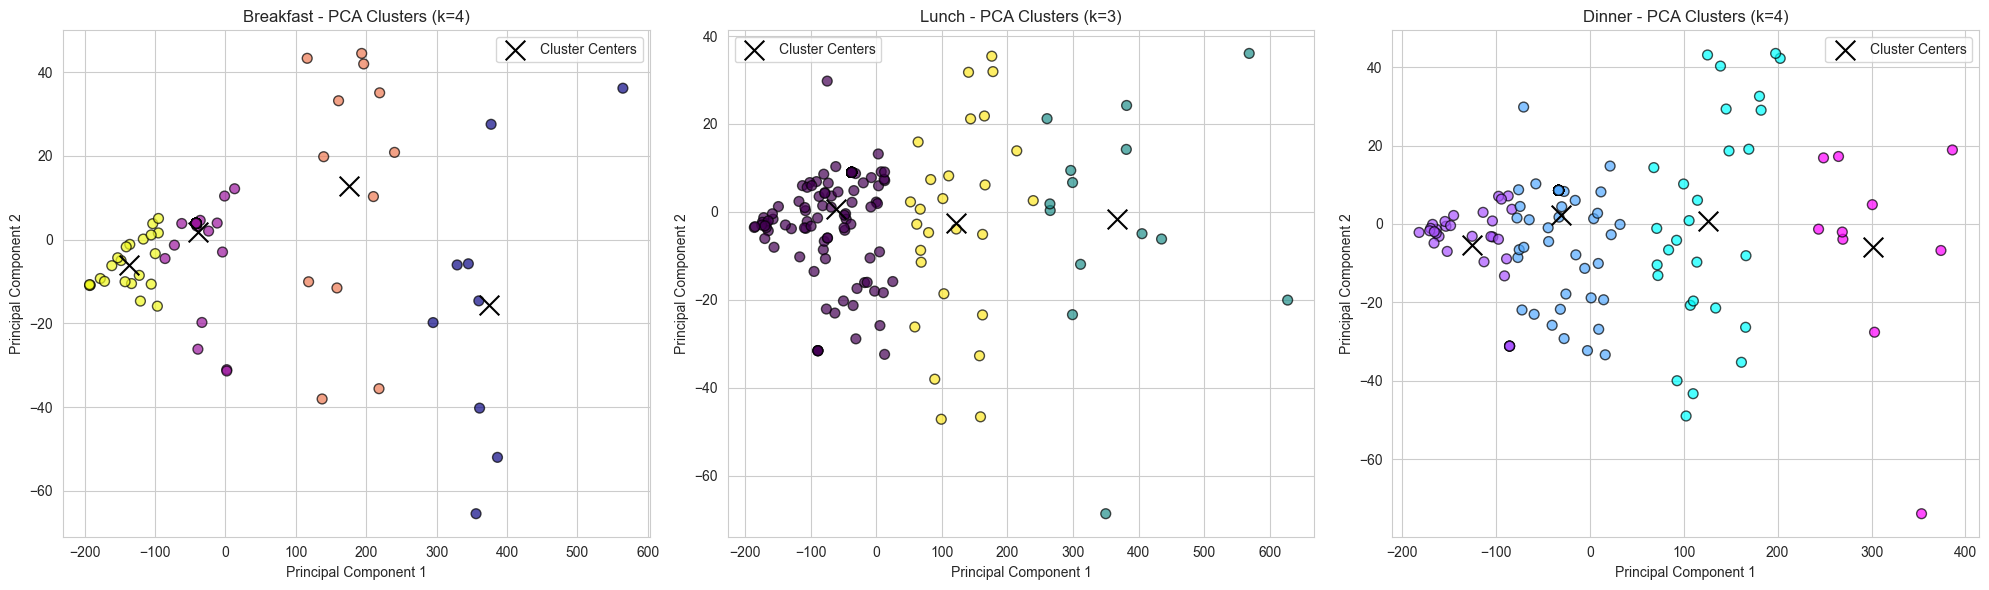

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def plot_pca_clusters_all():
    plt.figure(figsize=(20,6))
    datasets = [
        ('Breakfast', bf_features, 'plasma'),
        ('Lunch', ln_features, 'viridis'),
        ('Dinner', dn_features, 'cool'),
    ]

    for i, (label, data,cmap) in enumerate(datasets):
        _, _, elbow_k, _ = get_kmeasn_metrics(data)

        pca= PCA(n_components=2)
        X = data.values if hasattr(data, 'values') else data
        reduced_data = pca.fit_transform(X)

        kmeans = KMeans(n_clusters=elbow_k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)

        cluster_centers_reduced = pca.transform(kmeans.cluster_centers_)

        #plot

        ax=plt.subplot(1,3,i+1)
        scatter=ax.scatter(
            reduced_data[:,0],
            reduced_data[:,1],
            c=labels,
            cmap=cmap,
            alpha=0.7,
            edgecolor='k',
            s=50

        )

        #plot Cluster centers

        ax.scatter(
            cluster_centers_reduced[:,0],
            cluster_centers_reduced[:,1],
            c='black',
            marker='x',
            s=200,
            label='Cluster Centers'

        )

        ax.set_title(f'{label} - PCA Clusters (k={elbow_k})')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.grid(True)
        ax.legend()
    
    plt.tight_layout()
    plt.show()
plot_pca_clusters_all()

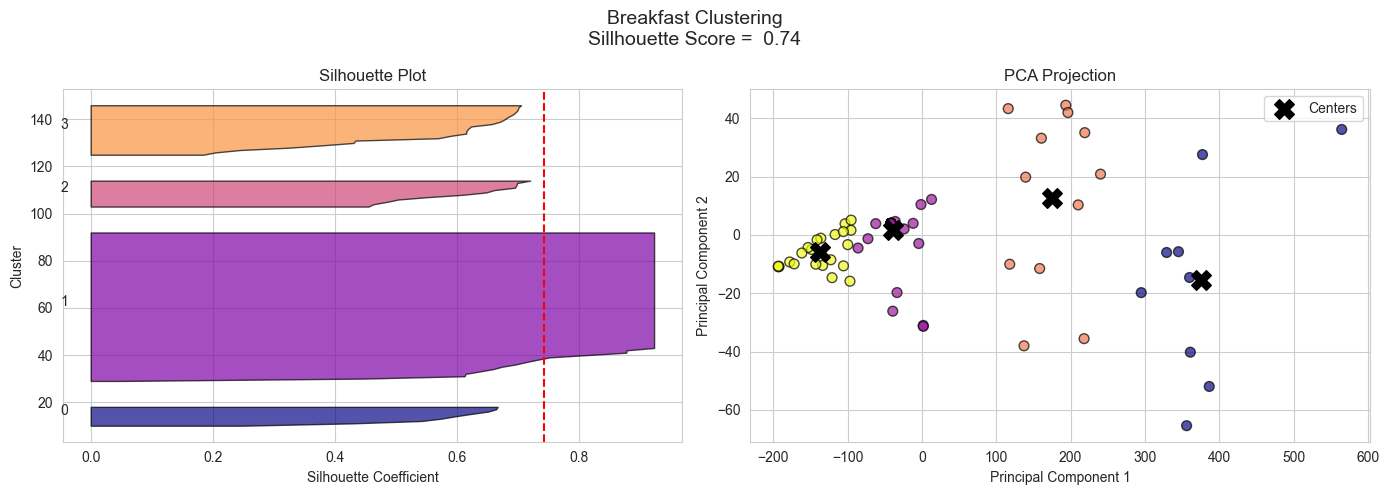

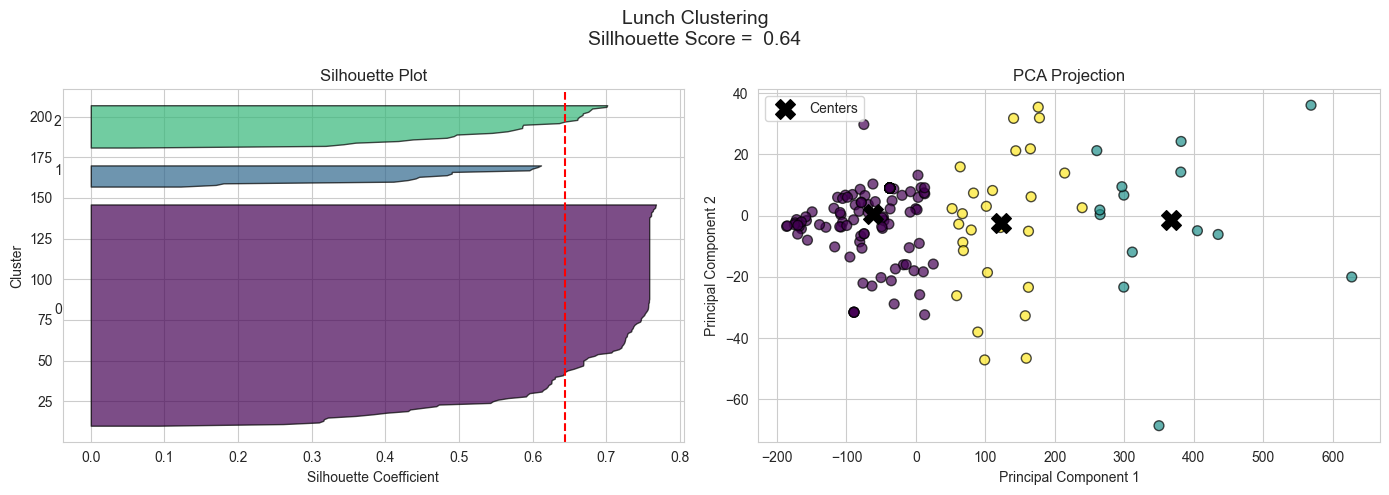

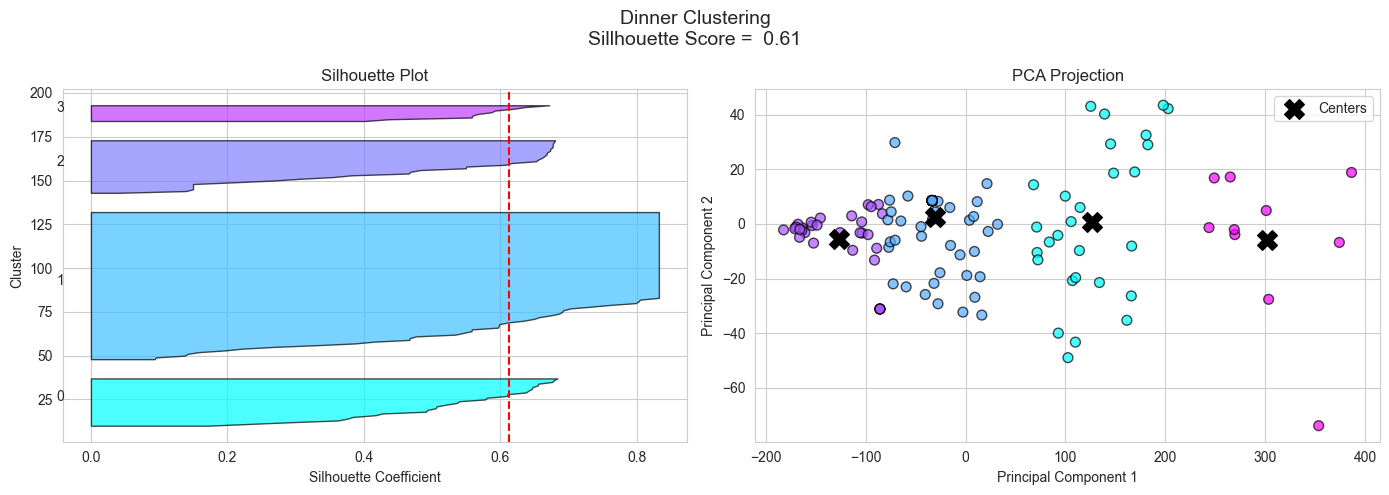

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_pca_and_silhouette():
    datasets = [
        ('Breakfast', bf_features, 'plasma'),
        ('Lunch', ln_features, 'viridis'),
        ('Dinner', dn_features, 'cool'),
    ]

    for label, data, cmap in datasets:
        _, _, elbow_k, _ = get_kmeasn_metrics(data)

        pca = PCA(n_components=2)
        X = data.values if hasattr(data, 'values') else data
        reduced_data = pca.fit_transform(X)

        kmeans = KMeans(n_clusters=elbow_k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        sil_avg = silhouette_score(data, labels)
        sil_values = silhouette_samples(data, labels)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(f"{label} Clustering\nSillhouette Score = {sil_avg: .2f}", fontsize= 14)

        y_lower = 10
        for i in range(elbow_k):
            ith_sil = sil_values[labels == i]
            ith_sil.sort()
            size_cluster_i = ith_sil.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.colormaps[cmap](float(i) / elbow_k)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_sil, facecolor=color, edgecolor='black', alpha=0.7)
            ax1.text(-0.05, y_lower +0.5 * size_cluster_i,str(i))
            y_lower = y_upper + 10
        
        ax1.axvline(x=sil_avg, color='red', linestyle='--')
        ax1.set_title('Silhouette Plot')
        ax1.set_xlabel('Silhouette Coefficient')
        ax1.set_ylabel('Cluster')
        ax1.grid(True)


        cluster_centers_reduced = pca.transform(kmeans.cluster_centers_)
        ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap=cmap,  edgecolor='k', s=50, alpha=0.7)
        ax2.scatter(cluster_centers_reduced[:, 0], cluster_centers_reduced[:, 1], c='black', marker='X', s=200, label='Centers')
        ax2.set_title("PCA Projection")
        ax2.set_xlabel('Principal Component 1')
        ax2.set_ylabel('Principal Component 2')
        ax2.legend()
        ax2.grid(True)
        plt.tight_layout()
        plt.show()
plot_pca_and_silhouette()

In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import csv

# --------------------------
# Step 1: User TDEE and Calorie Management
# --------------------------

class VfcDietRecommendation:
    def __init__(self, age, height, weight, activity_level, body_type):
        self.age = age
        self.height = height
        self.weight = weight
        self.activity_level = activity_level
        self.body_type = body_type
        self.bmr = self.calculate_bmr()

    def calculate_bmr(self):
        if self.body_type == "endomorphic":
            return (10 * self.weight) + (6.25 * self.height) - (5 * self.age) - 161
        elif self.body_type == "ectomorphic":
            return (10 * self.weight) + (6.25 * self.height) - (5 * self.age) + 5
        elif self.body_type == "mesomorphic":
            return (10 * self.weight) + (6.25 * self.height) - (5 * self.age) + 100

    def calculate_calories(self, goal):
        activity_levels = {
            "sedentary": 1.2,
            "lightly_active": 1.375,
            "moderately_active": 1.55,
            "very_active": 1.725,
            "extra_active": 1.9
        }
        tdee = self.bmr * activity_levels.get(self.activity_level, 1.2)

        if goal == "weight_loss":
            return tdee * 0.8
        elif goal == "weight_gain":
            return tdee * 1.2
        else:  # maintain
            return tdee

# --------------------------
# Step 2: Diet Recommendation System using KMeans
# --------------------------

class DietRecommendationSystem:
    def __init__(self, user):
        self.user = user
        self.breakfast_items = pd.read_csv("Data_sets/Breakfast_data.csv")
        self.lunch_items = pd.read_csv("Data_sets/Lunch_data.csv")
        self.dinner_items = pd.read_csv("Data_sets/Dinner_data.csv")

    def diverse_kmeans_recommendation(self, meal_items, target_calories, k, n_items=3):
        X = meal_items[['Calories']].values
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

        meal_items = meal_items.copy()
        meal_items['Cluster'] = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_.flatten()

        cluster_diffs = np.abs(cluster_centers - target_calories)
        ranked_clusters = np.argsort(cluster_diffs)

        recommendations = pd.DataFrame()

        for cluster_idx in ranked_clusters:
            cluster_data = meal_items[meal_items['Cluster'] == cluster_idx]
            if not cluster_data.empty:
                selected = cluster_data.sample(1)
                recommendations = pd.concat([recommendations, selected])
            if len(recommendations) >= n_items:
                break

        return recommendations.drop(columns=["Cluster"]).reset_index(drop=True)

    def recommend_diet_kmeans(self, goal):
        total_calories = self.user.calculate_calories(goal)

        if goal == "weight_loss":
            b_pct, l_pct, d_pct = 0.3, 0.4, 0.3
        elif goal == "weight_gain":
            b_pct, l_pct, d_pct = 0.25, 0.35, 0.4
        else:  # maintain
            b_pct, l_pct, d_pct = 0.3, 0.4, 0.3

        breakfast_calories = total_calories * b_pct
        lunch_calories = total_calories * l_pct
        dinner_calories = total_calories * d_pct

        recommended_diet = {
            "Breakfast": self.diverse_kmeans_recommendation(self.breakfast_items, breakfast_calories, k=4),
            "Lunch": self.diverse_kmeans_recommendation(self.lunch_items, lunch_calories, k=3),
            "Dinner": self.diverse_kmeans_recommendation(self.dinner_items, dinner_calories, k=4)
        }

        return recommended_diet

# --------------------------
# Step 3: Output Display Function
# --------------------------

def display_meal_recommendations(recommendations):
    preferred_columns = ['Food_Item', 'Item', 'Meal', 'Name']  # Flexible item name keys

    for meal_name, df in recommendations.items():
        print(f"\n--- {meal_name} ---")

        if df.empty:
            print("No recommendations found.")
            continue

        item_col = next((col for col in preferred_columns if col in df.columns), None)

        if item_col and 'Calories' in df.columns:
            print(df[[item_col, 'Calories']].to_string(index=False))
        else:
            print("Available columns:", df.columns.tolist())
            print(df.to_string(index=False))

# --------------------------
# Step 4: Run the Program
# --------------------------

if __name__ == "__main__":
    # Example input — replace with user input logic or UI later
    user = VfcDietRecommendation(
        age=25,
        height=170,
        weight=65,
        activity_level="moderately_active",
        body_type="mesomorphic"
    )

    goal = "weight_loss"  # Choose from: "weight_loss", "weight_gain", "maintain"

    diet_system = DietRecommendationSystem(user)
    recommendations = diet_system.recommend_diet_kmeans(goal)

    display_meal_recommendations(recommendations)


--- Breakfast ---
Available columns: ['Unnamed: 0', 'Food_items', 'VegNovVeg', 'Junk Food', 'Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars', 'Link']
 Unnamed: 0          Food_items  VegNovVeg  Junk Food  Calories  Fats  Proteins  Iron  Calcium  Sodium  Potassium  Carbohydrates  Fibre  VitaminD  Sugars                                                                         Link
         47             Almonds          0          0       579  50.0      21.0  3.71    269.0     1.0      733.0           22.0   13.0       0.0     4.4 https://th.bing.com/th/id/OIP.pSEGKJwkc3JWMBhb9b1PZgHaHa?rs=1&pid=ImgDetMain
         60 Cereals-Corn Flakes          0          0       384   0.9       5.9 19.40      2.0   571.0      107.0           88.0    2.7     286.0     7.8 https://th.bing.com/th/id/OIP.uw-I4l_tQBeFWPEy8cxavgHaE8?rs=1&pid=ImgDetMain
        212        Pakhala Bhat          0          0       150   5.0       4.0  1.0